
# PROJECT:  [Analysis of movie films]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Data Understanding">Data Understanding</a></li>
<li><a href="#Data Preparation/cleaning">Data Preparation/cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">limitations</a></li>
</ul>

# <a id='intro'></a>
# INTRODUCTION:

## Dataset Description 

<p> This project contains dataset from various credible sources:Box office,IDMB etc.Our goal is to helm Microsoft company in providing insights on how best to start their original content creation. We will analyse these datasets in order to help this company create movie films that will thrive in market and generate income.With the help of our analysis questions; we will be able to enlighten microsoft on a direction/path to follow while starting their film studio.</p>
<p>THis project I will be working with budget and movies dataset to help me with my analysis</p>




### Question(s) for Analysis

<ul>
 <li>1 What kind of movie contents in terms of genre perform the best?</li>
 <li>2 What  film rating has the highest count?</li>
 <li>3 Does budgetary allocations affect the gross income?</li>
 <li>4 Does movie director affect the rating/ views of a movie film?</li>
    </ul>

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
%matplotlib inline

<a id='wrangling'></a>
# DATA UNDERSTANDING:
Here will check our variables and try as much as possible to understand it and how it will relate to our questions

In [6]:
#loading our movie info tsv file
info=pd.read_csv("rt.movie_info.tsv", sep='\t')
info.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


Lets understand our info data here, will focus on , the genre ,director writer and rating colums

In [7]:
#Lets get the number of rows and columns
info.shape

(1560, 12)

From above we have 1560 rows and 12 columns
<p>Lets get information on our dataset and the datatypes</p>

In [9]:
#retriving information
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB



<p>The runtime,dvd_date,theatre_date does not have the correct datatypes we will have to convert them at later stage</p>

In [10]:
#check if there is any duplicate data
info.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1555    False
1556    False
1557    False
1558    False
1559    False
Length: 1560, dtype: bool

wow!we do not have any data duplicates

# DATA CLEANING:
Checking for Validity, Accuracy, Completeness, Consistency and Uniformity of the Data.

In [11]:
#checking sum of null values
info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

<p>from the above the id column is the only column that does not have null values</p>
<p>Our concern columns ratings, genre and director are having 3: 8: 199 values missing respectively</p>

In [12]:
#Drop some of the columns in the dataframe
info.drop(["box_office","studio","currency"], axis=1, inplace=True)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   runtime       1530 non-null   object
dtypes: int64(1), object(8)
memory usage: 109.8+ KB


we have dropped the box, office,studio and currency which had the most missing values

in our next cells will try replacing the null values with a variable , missing

In [13]:
#function for filling Null values in the table
info=info.fillna("missing")

In [14]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1560 non-null   object
 2   rating        1560 non-null   object
 3   genre         1560 non-null   object
 4   director      1560 non-null   object
 5   writer        1560 non-null   object
 6   theater_date  1560 non-null   object
 7   dvd_date      1560 non-null   object
 8   runtime       1560 non-null   object
dtypes: int64(1), object(8)
memory usage: 109.8+ KB


From the above,we have replaced all the null values with missing including the columns that we will not use.

In [15]:
#loading our movie buudget file
budget=pd.read_csv("tn.movie_budgets.csv")
budget.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


lets describe our dataset

In [16]:
#retriving information
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From above we have 1582 rows and 6 columns,
<p>There is no null values in our dataset which is great!</p>


In [17]:
#Drop some of the columns in the dataframe
budget.drop(["id","release_date"], axis=1, inplace=True)
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5782 non-null   object
 1   production_budget  5782 non-null   object
 2   domestic_gross     5782 non-null   object
 3   worldwide_gross    5782 non-null   object
dtypes: object(4)
memory usage: 180.8+ KB


<p>production budget and domestic gross is an object, we should change to integers because its numerical</p>

In [18]:
#removing the $ sign at the begining of our numbers
budget["production_budget"]=budget["production_budget"].str.replace('$', '',regex=True)
budget.head(2)

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"410,600,000","$241,063,875","$1,045,663,875"


In [19]:
#removing the $ sign at the begining of our numbers
budget["domestic_gross"]=budget["domestic_gross"].str.replace('$', '',regex=True)
budget.head(2)

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"425,000,000","760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","$1,045,663,875"


In [20]:
#removing the $ sign at the begining of our numbers
budget["worldwide_gross"]=budget["worldwide_gross"].str.replace('$', '',regex=False)
budget.head(2)

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"425,000,000","760,507,625","2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"


In [21]:
type("production_budget")
type("domestic_gross")
type("worldwide_gross")

str

We have to convert the numbers from strings to object datatypes

In [22]:
#convert the numbers from strings to object datatypes
budget['domestic_gross'] = budget['domestic_gross'].str.replace(",","").astype(float)
budget.head(2)

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"425,000,000",760507625.0,"2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"410,600,000",241063875.0,"1,045,663,875"


In [23]:
#convert the numbers from strings to object datatypes
budget["production_budget"] = budget["production_budget"].str.replace(",","").astype(float)
budget.head(2)



,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000.0,760507625.0,"2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,"1,045,663,875"


In [24]:
#convert the numbers from strings to object datatypes
budget["worldwide_gross"] = budget["worldwide_gross"].str.replace(",","").astype(float)
budget.head(2)

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000.0,760507625.0,2.776345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09


In [25]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              5782 non-null   object 
 1   production_budget  5782 non-null   float64
 2   domestic_gross     5782 non-null   float64
 3   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(1)
memory usage: 180.8+ KB


Lets add a new column that contains the difference between domestic_gross and production_budget

In [53]:
#lets add a new column that contains the difference between domestic_gross and production_budget
Net_income=budget["domestic_gross"]-budget["production_budget"]
budget["Net_income"] = Net_income
budget.head(2)

,movie,production_budget,domestic_gross,worldwide_gross,Net_income
0,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0


...
...
...

# EXPLORATORY DATA ANALYSIS:
After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.

<h3>1.What genre of movie films generate a lot of income/traffic</h3>

In [27]:
info.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes


In [28]:
  #most common genre of film
info["genre"].mode()

0    Drama
Name: genre, dtype: object

In [29]:
# Counting the value of different genres
number_of_genre=info["genre"].value_counts()
number_of_genre

Drama                                                                                     151
Comedy                                                                                    110
Comedy|Drama                                                                               80
Drama|Mystery and Suspense                                                                 67
Art House and International|Drama                                                          62
                                                                                         ... 
Art House and International|Drama|Sports and Fitness                                        1
Comedy|Documentary|Musical and Performing Arts|Special Interest                             1
Comedy|Cult Movies|Mystery and Suspense|Science Fiction and Fantasy                         1
Action and Adventure|Art House and International|Mystery and Suspense|Special Interest      1
Comedy|Drama|Kids and Family|Sports and Fitness             

In [30]:
# Making a new dataframe for the top 10 genre with the most movie releases

genre_top10 = info["genre"].value_counts()
genre_top10 = genre_top10.head(10) 
genre_top10

Drama                                              151
Comedy                                             110
Comedy|Drama                                        80
Drama|Mystery and Suspense                          67
Art House and International|Drama                   62
Action and Adventure|Drama                          42
Action and Adventure|Drama|Mystery and Suspense     40
Drama|Romance                                       35
Comedy|Romance                                      32
Art House and International|Comedy|Drama            31
Name: genre, dtype: int64

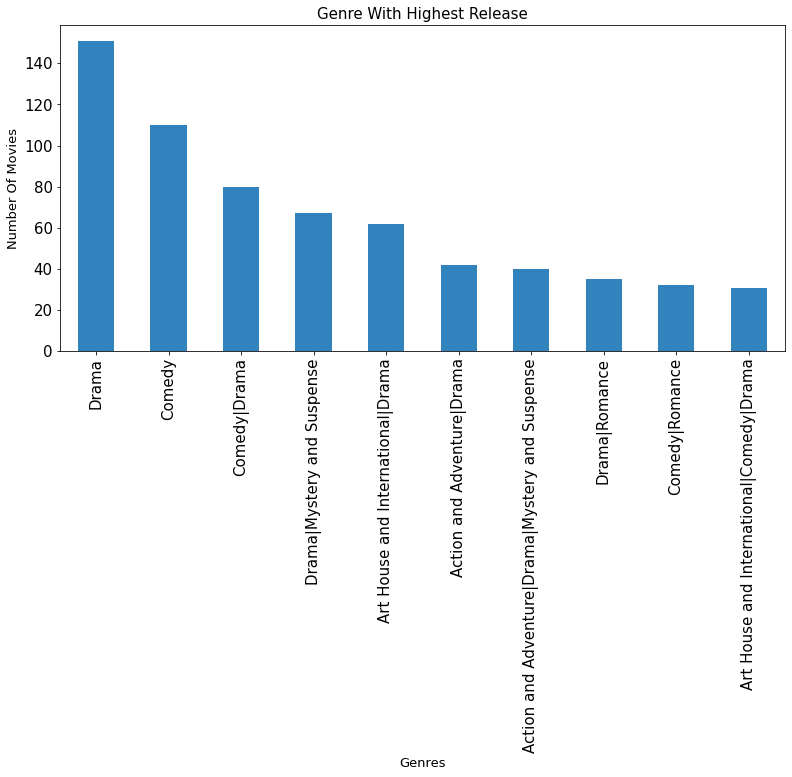

In [31]:

genre_top10.plot(kind= 'bar',figsize = (13,6),fontsize=15,colormap='tab20c')
              
plt.title("Genre With Highest Release",fontsize=15)

plt.ylabel("Number Of Movies",fontsize= 13)
plt.xlabel("Genres",fontsize=13)

plt.show()


We see that people like drama as drama is the most prevalent, followed by Comedy, Comedy/drama

<h3>2.What film rating has the highest count?</h3>

In [32]:
info.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes


Lets understand what these abbreviations mean in our ratings,will rename them.

Resricted:This rating means the film contains adult material such as adult activity, harsh language, intense graphic violence, drug abuse and nudity
NR:Not Rated
g:general audience
pg:parental guidance
NC17:Adults only

In [33]:
#we are going to replace the abbreviation with their meaning
info["rating"] = info["rating"].replace({"R": "Restricted,","G":"General_audience","NR":"Not_rated","PG":"Parental_Guidance","NC17":"Adults_only"})
info.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...","Restricted,",Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...","Restricted,",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes


In [34]:
#lets check the rating counts
info["rating"].value_counts()

Restricted,          521
Not_rated            503
Parental_Guidance    240
PG-13                235
General_audience      57
missing                3
Adults_only            1
Name: rating, dtype: int64

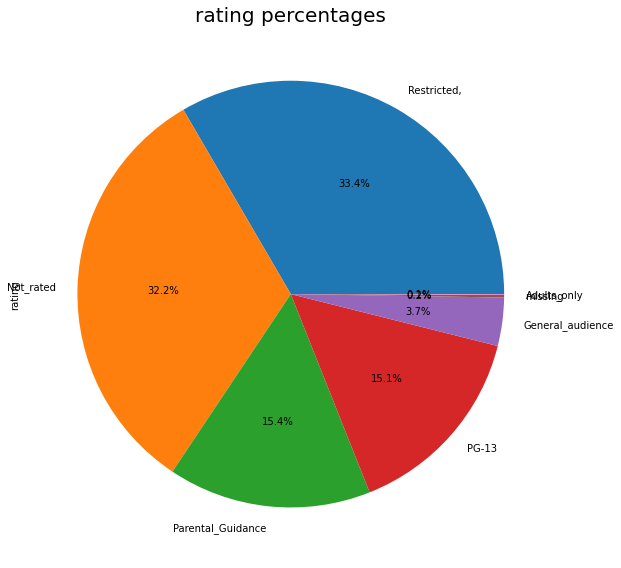

In [35]:
# Plotting the ratings comparison

info["rating"].value_counts().plot.pie(autopct = "%1.1f%%",figsize = (12,8))

plt.title("rating percentages", fontsize = 20)
plt.tight_layout()
plt.show()

we can also plot a  histogram of the same to have a better visualisation


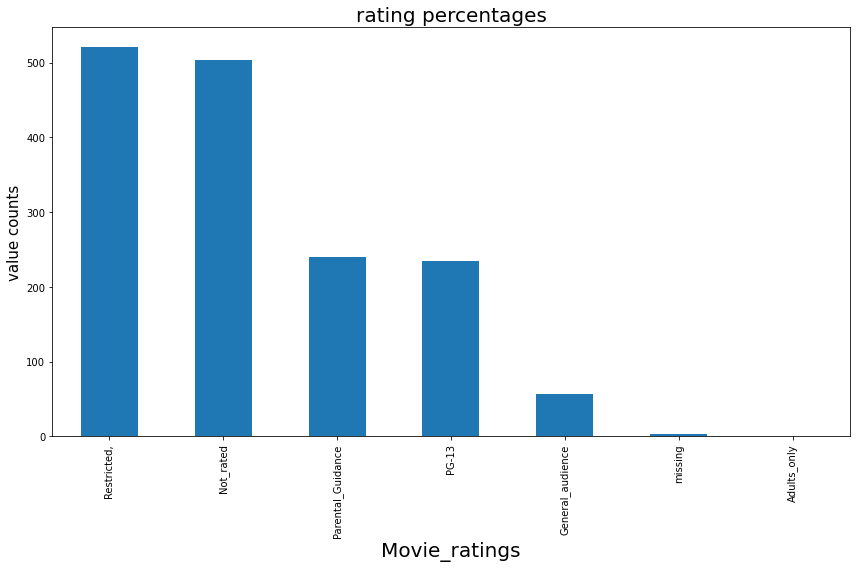

In [36]:
info["rating"].value_counts().plot.bar(figsize = (12,8))

plt.title("rating percentages", fontsize = 20)
plt.xlabel("Movie_ratings", fontsize = 20)
plt.ylabel("value counts", fontsize = 15)

plt.tight_layout()
plt.show()

We can see that Restricted for adults only and Not rated have the highest value counts,with a percentage of 33.34%,32.2% respectively: meaning its being released alot by studios

 ## 3. Does movie director affect the rating/ views of a movie film?

In [37]:
#value counts of directors who direct the films
director_counts=info["director"].value_counts()
director_counts

missing               199
Steven Spielberg       10
Clint Eastwood          8
William Friedkin        4
Curtis Hanson           4
                     ... 
Evans Butterworth       1
Jeannot Szwarc          1
Maroun Bagdadi          1
James Hogan             1
David Mickey Evans      1
Name: director, Length: 1126, dtype: int64

As we can see there are a lot of missing values in this column, so this data is not really helping us to determine if a director affects the release of film.
<p>Steven Spielberg has directed a tonn of films

 ## 4. Does budgetary allocations affect the gross income?

In [54]:
#lets call our budget dataset 
budget.head(2)

,movie,production_budget,domestic_gross,worldwide_gross,Net_income
0,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0


In [55]:
#movies with the highest production budget
movie_top10 = budget["movie"].value_counts()
movie_top10= pd.DataFrame(budget) 
movie_top10 = movie_top10.head(10) 
movie_top10

,movie,production_budget,domestic_gross,worldwide_gross,Net_income
0,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0
5,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,630662225.0
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,378815482.0
7,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,9420425.0
8,Justice League,300000000.0,229024295.0,6.559452e+08,-70975705.0
9,Spectre,300000000.0,200074175.0,8.796209e+08,-99925825.0


From this table we can see that the movies with the highes bugdets were awatar  pirates, dark phonix respectively 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


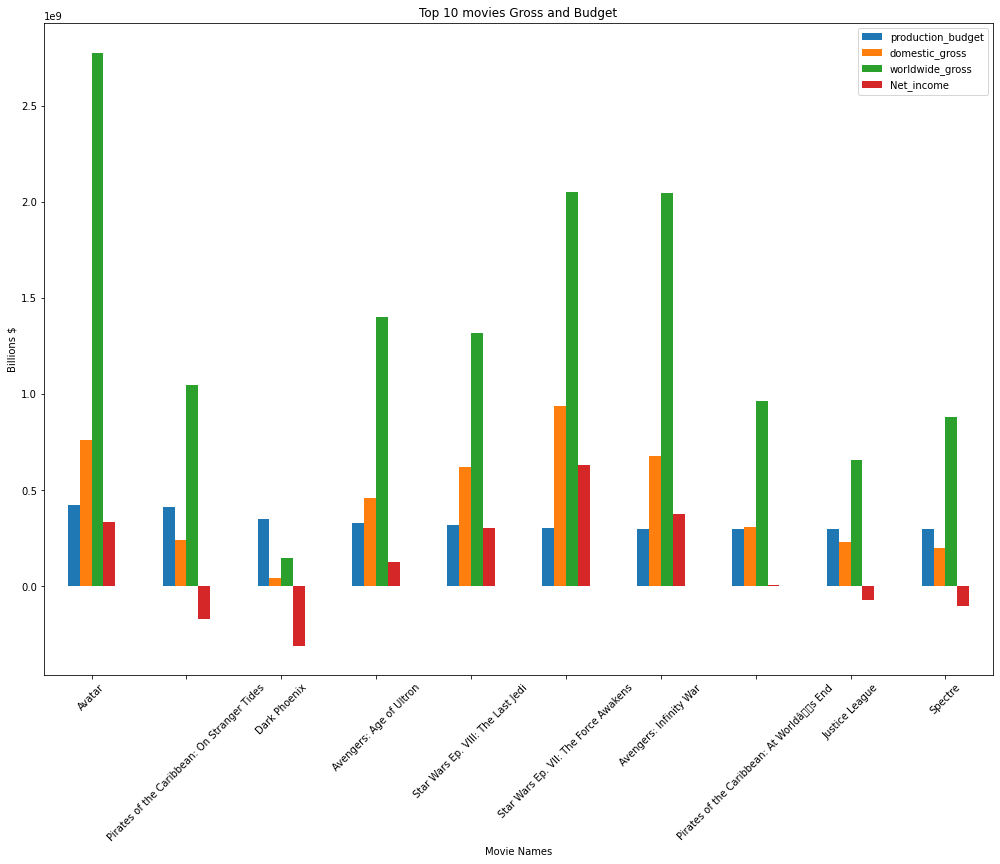

In [56]:
# Ploting the Top 10 movies by Gross and Budget

ax = movie_top10.plot.bar(x ='movie', rot = 0,figsize=(17,12))
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , rotation = '45')

# Lables and Title

plt.title("Top 10 movies Gross and Budget")
plt.xlabel("Movie Names")
plt.ylabel("Billions $")
plt.show()

From the above bar we can say that:
    <p>'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.</p>
    <p>Pirates of the carribean sea dark phonenix,justice league incurred a loss even though their production budget was high</p>
    <p>All movies did very well worldwide rather than their local areas</p>
  

# CONCLUSION:


<p>Drama is the most popular genre, following by action, comedy and drama/comedy.</p>
Movie rating R are the most released movie films

Steven Spielberg has directed a tonn of films
'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.

Revenue is directly connected to the budget.
Movies with higher budgets have shown a corresponding increase in the revenues.